In [1]:
%matplotlib notebook

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Single Antenna

Before we bite off more than we can chew and go running behind interferomters, let's understand a single antenna. Single antennas (like the GBT, Arecibo, FAST, Effelsberg etc) all behave this way so this exercise won't be for nothing.

Radio antennas are beautiful, unlike their optical counterparts they are always **diffraction limited**. Beauty is a curse, they are terribly **chromatic**.

## Diffraction limited

This *really* means that the beam of a single antenna can be approximated as the diffraction pattern of a single slit (in 1D) or the airy disk (in 2D). Let's keep it simple for now and go 1D. 

Below is the equation for the output of the diffraction pattern of a single slit (in case you high school was like mine and you don't remember). It is a function of $\theta$ which at small angles approximates to a distance.

$$I\left(\theta\right) = I_0 \text{sinc}^2\left(\frac{\pi w sin \theta}{\lambda}\right)$$

$I_0$ : Random scaling (Like all good quantities in physics let's set this to 1)

$w$ : Width of the slit

$\lambda$ : Wavelength of light (remember you needed a laser for the diffraction rings experiment?)

<IPython.core.display.Javascript object>


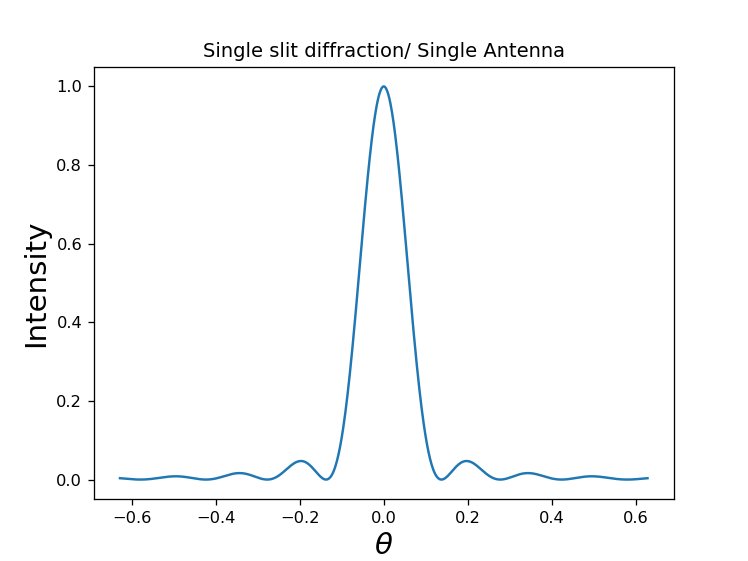

Text(0.5,1,'Single slit diffraction/ Single Antenna')

In [2]:
# Diffraction with single slit
theta = np.linspace(-np.pi/5,np.pi/5,num=1000)
wv = 2    # m  # lambda
a = 14.6  # width of slit
I = (np.sinc(a*np.sin(theta)/wv))**2

fig,ax = plt.subplots(1,1)
ax.plot(theta,I)
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity',fontsize=18)
ax.set_title('Single slit diffraction/ Single Antenna')

## Beam Chromaticity

Remember chromatic abbreration of optical telescopes? Radio telescopes suffer from the same problem but it is much worse so it's a good thing to keep in mind.

<IPython.core.display.Javascript object>


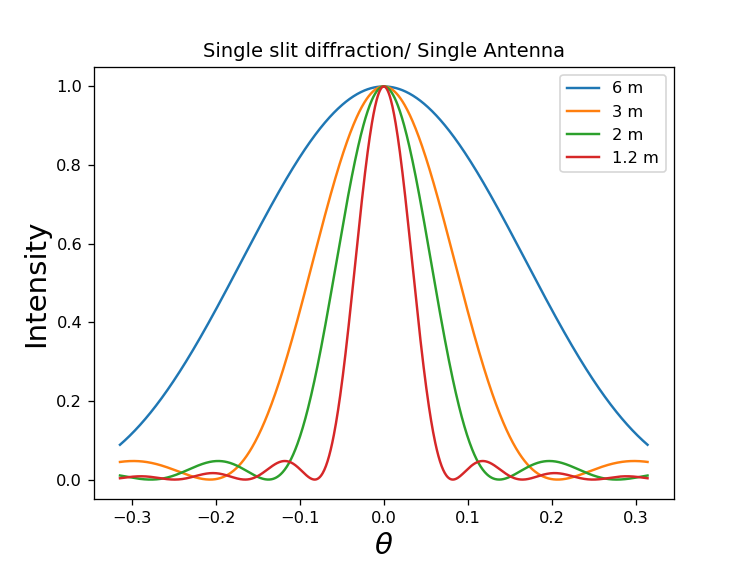

Text(0.5,1,'Single slit diffraction/ Single Antenna')

In [6]:
# Chromaticity of single slit

theta = np.linspace(-np.pi/10,np.pi/10,num=1000)
wv = [6, 3, 2, 1.2]   # m  # lambda over bandwidth of HERA
a = 14.6              # m  # width of slit- diameter of HERA dish

fig,ax = plt.subplots(1,1)
for w in wv:
    I = (np.sinc(a*np.sin(theta)/w))**2
    ax.plot(theta,I,label=str(w)+' m')

ax.legend()
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity',fontsize=18)
ax.set_title('Single slit diffraction/ Single Antenna')

Just for some perspective (and because I made this plot) here is how that beam looks on a horizon to horizon scale.

<IPython.core.display.Javascript object>


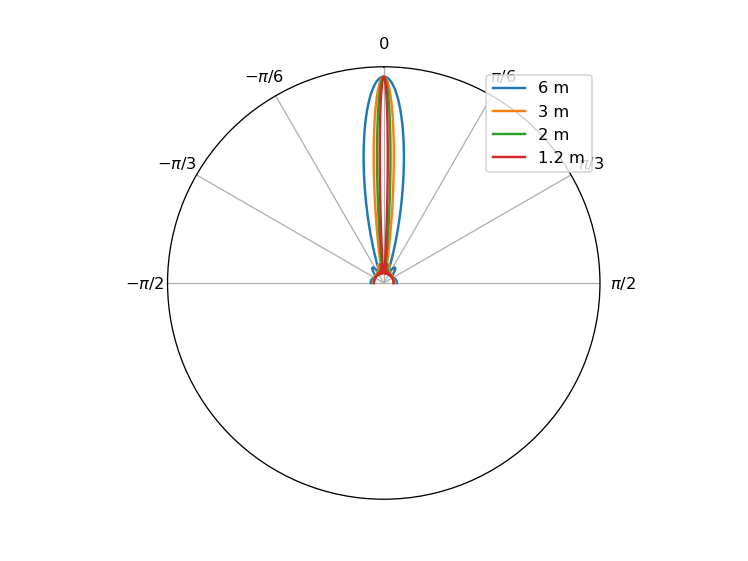

In [5]:
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)

plt.figure()
ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])

for w in wv:
    I = (np.sinc(a*np.sin(theta)/w))**2
    ax.plot(theta,I,label=str(w)+' m')
ax.legend()

# 2D and Airy Disks

Let's venture into 2D now and introduce ourselves to some lingo on the way.

## Aperture Plane

It's a fancy term for how your array looks from a helicopter. For a single antenna, the view is not spectacular unfortunately. (It is easy to plot though!)

<IPython.core.display.Javascript object>


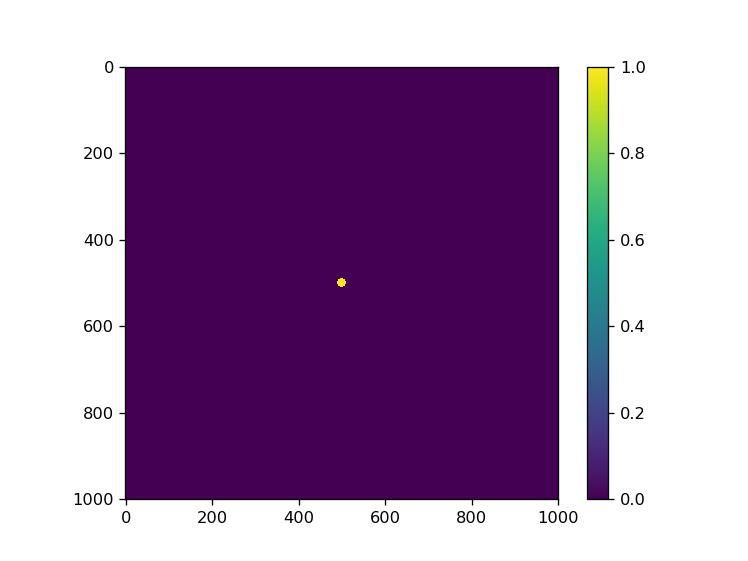

In [10]:
x,y = np.meshgrid(np.linspace(-5,5,num=1000),np.linspace(-5,5,num=1000))
f = np.sqrt(x**2+y**2)
select = f<0.1
f[select] = 1
f[np.logical_not(select)] = 0

plt.figure()
plt.imshow(f,cmap='viridis')
plt.colorbar()

## The Electric Field Plane

The diffraction pattern (or Airy disk) of the single slit (or single circular antenna) has a jargony term- the electric field plane. This is how an electromagnetic signal (like a radio wave) is "sampled" by your telescope.

<IPython.core.display.Javascript object>


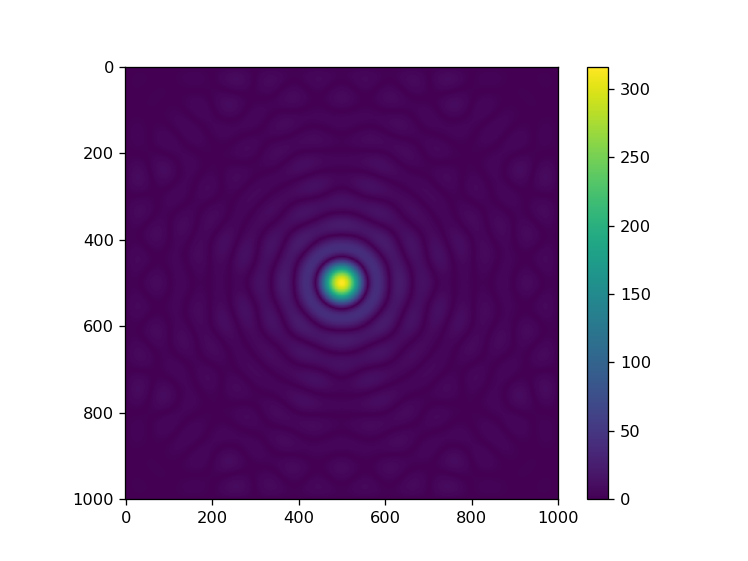

In [9]:
F = np.fft.fftshift(np.fft.fft2(f))

plt.figure()
plt.imshow(np.abs(F))#, norm=LogNorm(vmin=0.01, vmax=30000))
plt.colorbar()

## Primary Beam

You might have heard this term before- the primary beam of an antenna. This is just translating the above electric field into a power. I'm simply going to square like you'd expect.

If you're used to optical telescope lingo, this is what you would call the **Point Spread Function (PSF)**.

<IPython.core.display.Javascript object>


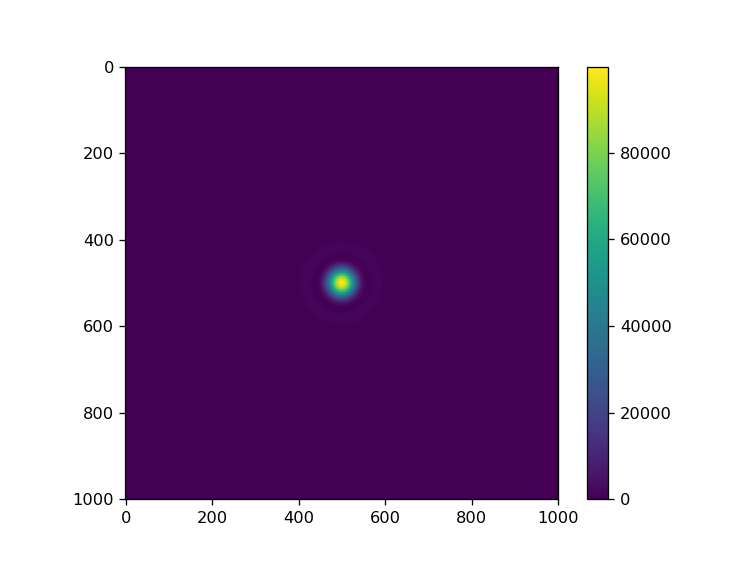

In [11]:
P = np.abs(F)**2

plt.figure()
plt.imshow(P)
plt.colorbar()

## UV Plane

If you came hunting for this tutorial you certainly heard of the UV Plane and got confused by it (or understood it!).

**The UV Plane is the fourier transform of the PSF.**

This shows, (for the technically empowered), how different spatial scales are sampled by your telescope. This will seem very trivial for a single telescope- the spatial scale you see is inversely proportional to the diameter of the dish. This won't be quite as trivial for interferometers but we'll put that off for later.

If you are used to optical lingo, this is what you would call the **Optical Transfer Function**.  The below plot will be uninteresting like I promised.

<IPython.core.display.Javascript object>


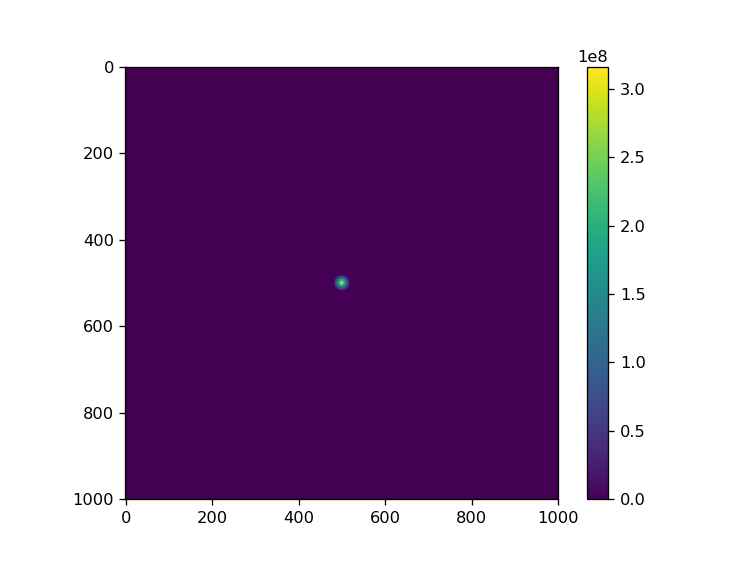

In [12]:
uv = np.fft.fftshift(np.fft.fft2(P))

plt.figure()
plt.imshow(np.abs(uv))
plt.colorbar()

If you are used to the 1D Optical Transfer functions, you'll get that back by splicing through the above plot.

<IPython.core.display.Javascript object>


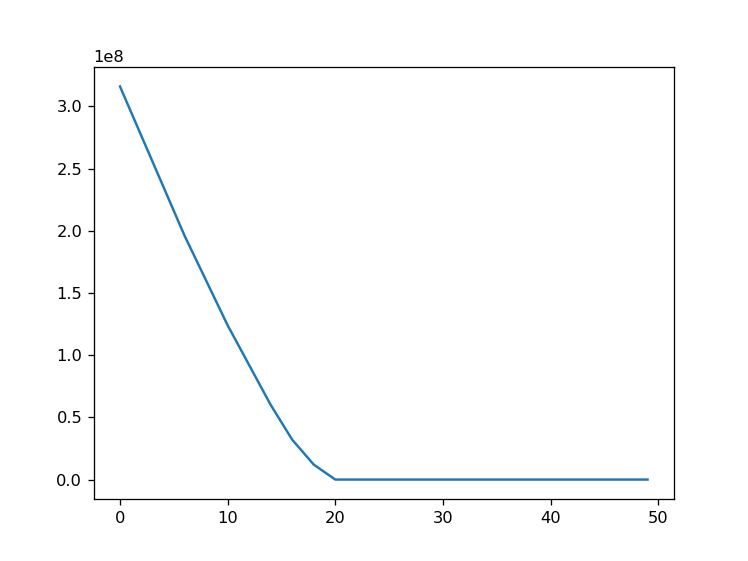

In [13]:
plt.figure()
plt.plot(np.abs(uv[500][500:550]))

# Interferometry!

Okay, 'nuf said. Bring in the other telescopes, I want an interferometer.

Good old Young, back in 1800 put two slits together and shone light through them (why don't we do weird things like this anymore?). He found that the light through the slits "interferes" and hence called the output *interference*. 

Before I jump into how it applies to interferometers, let us fondly remember his conclusions.

## Young's double slit experiment

Below is an excerpt from a classic high school textbook:

Consider a parallel beam of light of wavelength **$\lambda =$ 800 nm** falling on two infinitely thin slits, distance **d= 4 mm** apart ($\frac{\lambda}{D} \sim 0.5''$). The location of the nulls (maxima) can be computed by arguing that the path difference of the two slits should be $\lambda/2$ ($\lambda$). Therefore, for the nulls

$$d\sin\theta = \left(m+\frac{1}{2}\right)\lambda\qquad m=\pm1,\pm2,\pm3..$$

The intensity of the fringes on a screen at a distance $y >> d$ away can be computed by adding the electric field vectors coherently. The electric field due to the two slits at an arbitrary location P can be written as follows, assuming they are both propagating in the same direction.

$$ E_1 = E_0\sin(kx+\omega t)\qquad E_2 = E_0\sin(kx+\omega t+\phi)$$


$$I \propto (\mathbf{E_1} + \mathbf{E_2})^2$$

$$I = I_0 \cos^2 \left(\frac{\pi d \sin \theta}{\lambda}\right)$$



**Tl;dr:** The only fact you needed to know was that the output is a $\cos^2$ function unlike the $sinc^2$ output of diffraction.

<IPython.core.display.Javascript object>


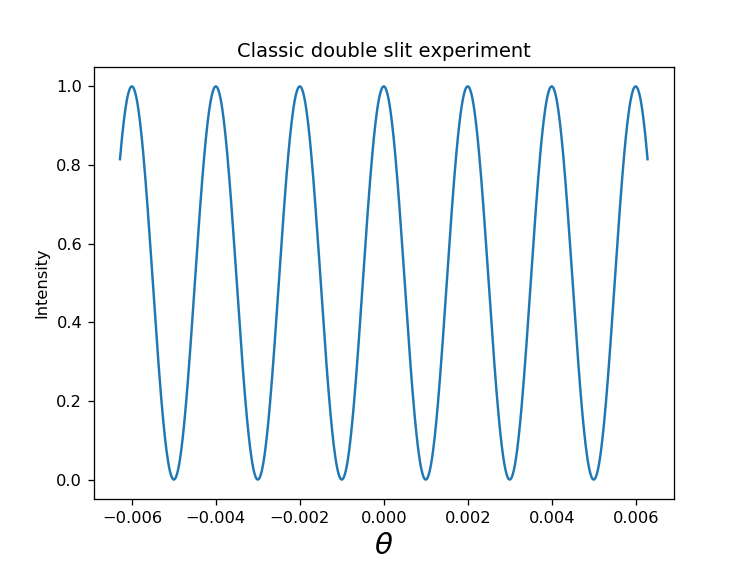

Text(0.5,1,'Classic double slit experiment')

In [14]:
theta = np.linspace(-np.pi/500,np.pi/500,num=1000)
d = 0.4e-3 #m
wv = 800e-9 #m 
I = (np.cos(np.pi*d*np.sin(theta)/wv))**2

fig,ax = plt.subplots(1,1)
ax.plot(theta,I)
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
ax.set_title('Classic double slit experiment' )

## My N-slit experiment

Typically a radio interferometer (unless your budget is severely been cut) has more than two elements, so let me remind you of what happens when you have more than one slit. Just for funsies.

The output with a generalized N number of slits (after some gory algebra and trignometry) is given by:

$$ I = I_0\frac{\sin^2\left(\frac{N\phi}{2}\right)}{\sin^2\left(\frac{\phi}{2}\right)}$$

$$\phi = \frac{2\pi d \sin \theta}{\lambda}$$

**Tl;dr:** The output is sharper than a simple $\cos^2$ function. The more elements you have, the sharper the response. This is why optical astronomers want diffraction gratings with many "elements".

<IPython.core.display.Javascript object>


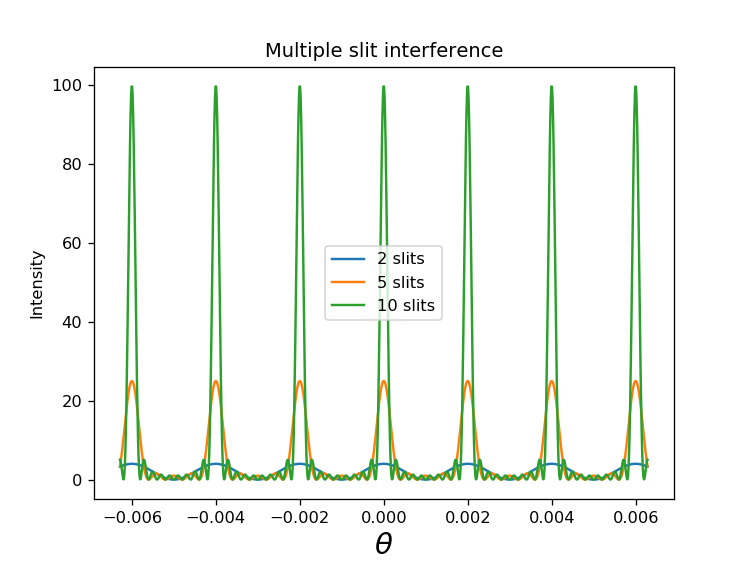

In [15]:
# N slit interference
theta = np.linspace(-np.pi/500,np.pi/500,num=1000)
d = 0.4e-3 #m
wv = 800e-9 #m #d/wv ~ 200
phi = np.pi*d*np.sin(theta)/wv

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
ax.set_title('Multiple slit interference')

for N in [2,5,10]:
    I = (np.sin(N*phi)/np.sin(phi))**2
    ax.plot(theta,I,label='%d slits'%N)
ax.legend()

# Finite width N slit interference

In the most generalised case, we have N slits all with finite width causing both interference and diffraction. The output intensity in this case is given by product of the diffraction pattern and the interference pattern- the diffraction pattern modulates the interference (since diffraction is caused by smaller spatial scales, they effect the larger modes).

$$I = I_0 \frac{\sin^2\left(\frac{N\phi}{2}\right)}{\sin^2\left(\frac{\phi}{2}\right)}\text{sinc}^2\left(\frac{\delta}{2}\right)$$

$$\phi = \frac{2\pi d \sin \theta}{\lambda}$$
$$\delta = \frac{2\pi w \sin \theta}{\lambda}$$

<IPython.core.display.Javascript object>


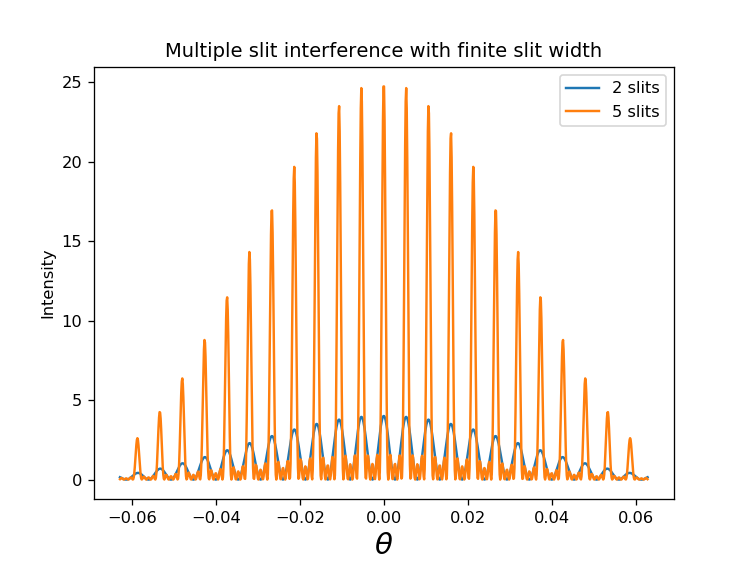

In [26]:
# Interference with finite slit width
theta = np.linspace(-np.pi/50,np.pi/50,num=1000)
wv = 800e-9 #m 
a = 0.01e-3 #m
d = 0.15e-3 #m
phi = np.pi*d*np.sin(theta)/wv

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
ax.set_title('Multiple slit interference with finite slit width')

for N in [2,5]: 
    I = ((np.sin(N*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/wv))**2
    ax.plot(theta,I,label='%d slits'%N)
ax.legend()

# Radio Interferometers

For a radio interferometer: 

**Antenna == Slit**

**Antenna Beam == Width of Slit**

Consider two antennas observing the redshifted 21cm emission ($\lambda = 210$cm)  at a spacing $d = 1460$ cm apart (HERA specs)

<IPython.core.display.Javascript object>


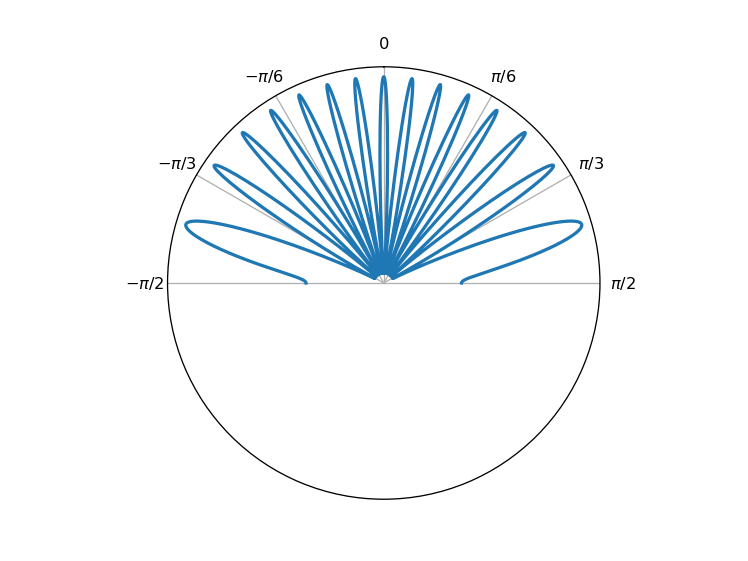

In [23]:
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)
# With HERA specs (in m)
wv = 2 
d = 14.6
I = (np.cos(np.pi*d*np.sin(theta)/wv))**2

plt.figure()
ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
ax.plot(theta,I,lw=2,label=r'$\lambda = 210$')

If you have been following so far, this *should* really take you by surpise. If not, go back and look at how a single antenna beam looked like on a similar plot.

## Why interferometry?

Maybe you have started philosophically asking yourself, "Why did I bring in the second antenna? I was better off with one." Don't be hasty. Not all is lost.

You made a trade off- you have many "beams" (the right term is **grating lobes**) now but each of them are narrower than your single fat beam. 

In other words, you took some of the uncertainity in intensity (due to resolution) and put it into uncertainity in location.

**Below:** I have plotted the single beam from the simulation above on the interferometric beams of the two element interferometer. The diameter of the two antennas here is same as the diameter of the single antenna in the simulation of the single beam above. The effect is not that noticeable on a $-\pi/2$ to $+\pi/2$ scale, but write up your own script to plot the two beams within a narrow range ($-\pi/5$,$+\pi/5$) and see if the difference is obvious.

<IPython.core.display.Javascript object>


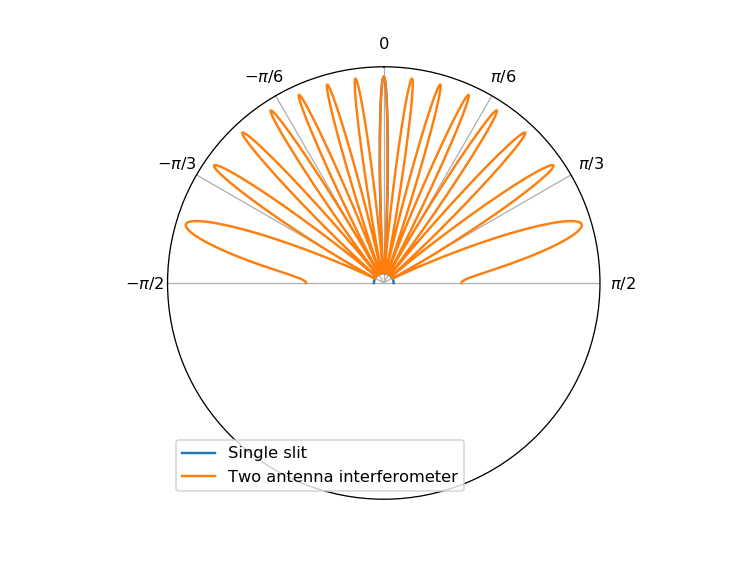

In [24]:
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)
wv = 2                # m  # lambda for HERA
a = 14.6              # m  # width of slit- diameter of HERA dish

plt.figure()
ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])

I = (np.sinc(a*np.sin(theta)/w))**2
ax.plot(theta,I,label='Single slit')
I = (np.cos(np.pi*d*np.sin(theta)/wv))**2
ax.plot(theta,I,label='Two antenna interferometer')
ax.legend()

# Beam chromaticity in interferometers


This is why chromaticity becomes important. Look below!

Chromatic abbretion in interferometers is crazy. Using a simple interferometer you will pick up different sources on the sky at different frequencies if your bandwidth is even around 200MHz. If your interferometer is *not* particularly designed to mitigate this (or sometimes even if it is), you can end up with very interesting effects- for example, the wedge in reionization power spectrum. 

An example of how you can mitigate it, is the beamformer in CHIME that interpolates between beams at different frequencies to ensure that the sky does not "artifically" change when looking at the same beam in different frequencies.

<IPython.core.display.Javascript object>


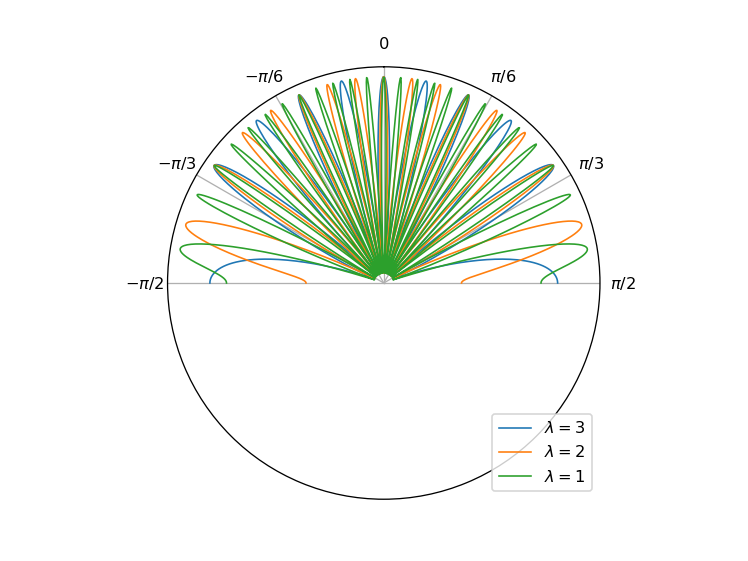

In [25]:
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)
wv = [3, 2, 1.2]   # m  # lambda over bandwidth of HERA
I = {}

for l in wv:
    I[l] = (np.cos(np.pi*d*np.sin(theta)/l))**2

plt.figure()
ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
for l in wv:
    ax.plot(theta,I[l],lw=1,label=r'$\lambda = %d$'%l)
ax .legend(loc=4)

# Aperture Plane- Interferometer edition

If you've read until this point you're ready to take on interferometers in 2D!

Let us consider a 4-element interferometer. Remember we said the aperture plane is just a helicopter view? Here's it.

<IPython.core.display.Javascript object>


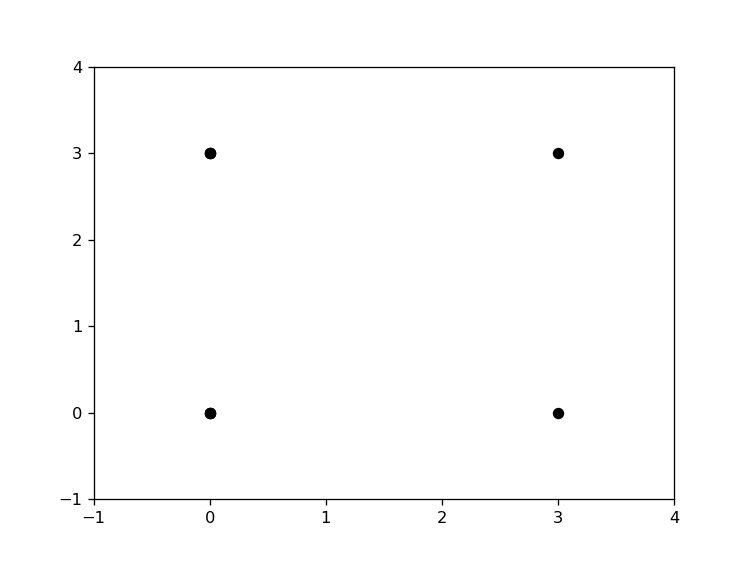

(-1, 4)

In [27]:
x,y = np.linspace(0,3,num=9,dtype=int),np.linspace(0,3,num=4,dtype=int)
ants = np.array([[1,0,0,1],list(np.zeros(4,dtype=int)),list(np.zeros(4,dtype=int)),[1,0,0,1]])
ants = np.hstack((ants,np.zeros_like(ants)));ants = np.hstack((ants,np.zeros_like(ants)))
ants = np.vstack((ants,np.zeros_like(ants)));ants = np.vstack((ants,np.zeros_like(ants)))

fig,ax = plt.subplots(1,1)
for l in x:
    for m in y:
        if ants[m][l]:
            ax.plot(l,m,'k',marker='o')
ax.set_xlim([-1,4])
ax.set_ylim([-1,4])

# UV Plane

We'll deal with the electric field and the power beam in just bit. First some math:

Aperture Plane: A
Electric Field Beam: E
Power Beam: P
UV Plane: V

                                          FFT
                                      A --------> E
                                      
                                                  |
                                                  | square
                                                  |
                                                  v
                                      
                                      V <-------- P
                                           iFFT
                                           
The story we told ourselves with single antennas is that- the fourier transform of the aperture plane give the electric field beam and the square of that gives the power beam. The fourier transform of the power beam gave us the UV Plane or the OTF. Invoking the convolution theorem it is easy to see that the missing link to get to the UV Plane from the aperture plane is simply a convolution.


                                          FFT
                                      A --------> E
                                      
                                      |           |
                      (A * conj(A))   |           | square
                                      |           |
                                      v           v
                                      
                                      V <-------- P
                                           iFFT

<IPython.core.display.Javascript object>


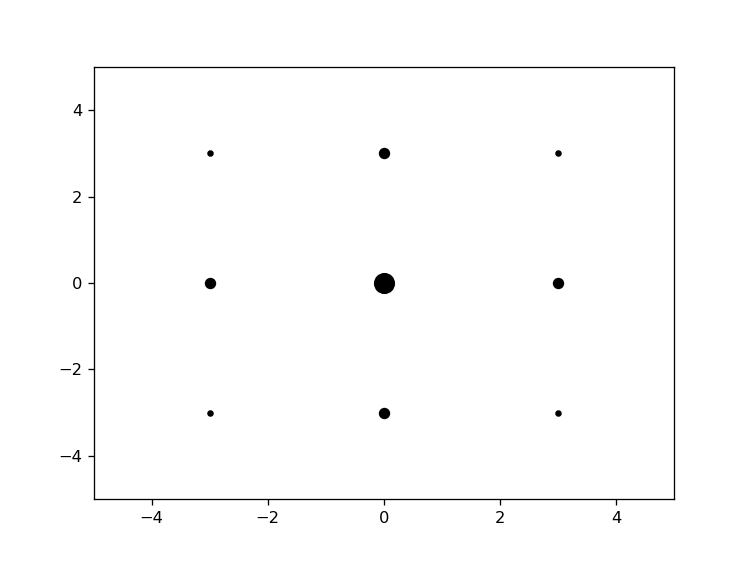

(-5, 5)

In [30]:
uv_plane = np.fft.fftshift(np.fft.ifft2(np.abs(np.fft.fft2(ants))**2))
u,v = np.shape(uv_plane)

fig,ax = plt.subplots(1,1)
for x in range(v):
    for y in range(u):
        if uv_plane[y][x]:
            ax.plot(x-8,y-8,'k',marker='o',markersize=3*np.abs(uv_plane[y][x]))
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

# UV coverage

You will often hear radio astronomers talk about "UV coverage" and how the UV coverage of certain arrays or analysis techniques makes imaging better or worse.

The area of the UV plane that the array can cover is called UV coverage. For example, in our hypothetical array above, the UV coverage is extremely bad. This is because, effectively, there are *only three points in the UV plane*.

*Why?* The central brightest point is the auto correlations of the antennas- they come from no separation between the antennas. The points to the left and right of the autocorrelations are equivalent (one is just the conjugate of the other). They come from a single baseline separation visibilities in the EW direction (x-axis). Similarly, the points to the top and bottom of the autocorrelation are equivalent and represent the single baseline separation in the NS direction (y-axis). The tiniest points at $45^o$ from the autocorrelations are the single baseline separations in the diagonal (NE,SW) directions.

To have good UV coverage you need antennas that are spread out and at different distances (quite unlike HERA). If antennas are equidistant, the visibilities they form will fall into the same UV bin and your coverage will not improve.

**Why talk about UV coverage?**

UV coverage is quite important for making images (which we all like to see) with radio telescopes. To understand how the UV plane is related to the image, wait for the next tutorial.